In [1]:
!pip install TFANN

  Created wheel for TFANN: filename=TFANN-1.0.1-py3-none-any.whl size=7542 sha256=9b46f48644bf1e524a65dea9c7d92742bd0645caf800a45614f1a77215c69186
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\63\c4\f0\02db7f8c1bef031e5206494205bfdd7eb9ff3679600399f8c0
Successfully built TFANN


In [3]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR

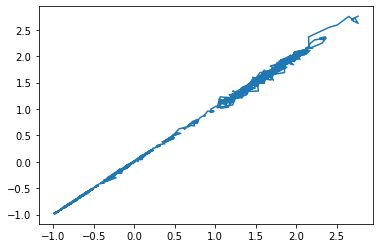

In [4]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('data//'+'amzn.csv', delimiter=",", skiprows=1, usecols=(1, 4))
#scales the data to smaller values
stock_data=scale(stock_data)
#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)
#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show()

In [5]:
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.








In [7]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.89967164 (Batch Size:   256)
Iter     2	      2.55173419 (Batch Size:   256)
Iter     3	      2.11253026 (Batch Size:   256)
Iter     4	      1.77991025 (Batch Size:   256)
Iter     5	      1.46186796 (Batch Size:   256)
Iter     6	      1.17425398 (Batch Size:   256)
Iter     7	      0.96458738 (Batch Size:   256)
Iter     8	      0.73124782 (Batch Size:   256)
Iter     9	      0.54588500 (Batch Size:   256)
Iter    10	      0.40505628 (Batch Size:   256)
Iter    11	      0.29633149 (Batch Size:   256)
Iter    12	      0.21105071 (Batch Size:   256)
Iter    13	      0.14368741 (Batch Size:   256)


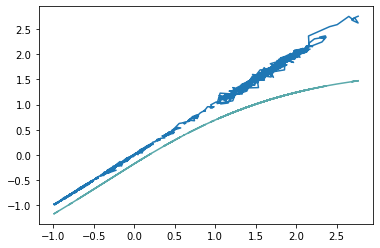

In [8]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show()

In [9]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [10]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      1.35635558 (Batch Size:   256)
Iter     2	      1.01770996 (Batch Size:   256)
Iter     3	      0.72999010 (Batch Size:   256)
Iter     4	      0.50885561 (Batch Size:   256)
Iter     5	      0.33597785 (Batch Size:   256)
Iter     6	      0.21288028 (Batch Size:   256)
Iter     7	      0.13535859 (Batch Size:   256)
Iter     8	      0.07793397 (Batch Size:   256)


In [12]:
dates

array([[-0.94101313],
       [-0.94237851],
       [-0.94696234],
       ...,
       [ 2.6868831 ],
       [ 2.73724004],
       [ 2.76490552]])

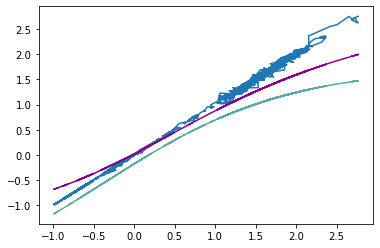

In [11]:
pricePredict2 = mlpr2.predict(dates)
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.plot(dates, pricePredict2, c='#8B008B')
mpl.show()

Epoch 1/3
2510/2510 [==============================] - 7s 3ms/step - loss: 2.9228
Epoch 2/3
2510/2510 [==============================] - 6s 2ms/step - loss: 2.9236
Epoch 3/3
2510/2510 [==============================] - 6s 2ms/step - loss: 2.9185
The stock market will reach to its lowest bottom on 2020-03-19 00:00:00
The lowest index the stock market will fall to is  247.02139258384705


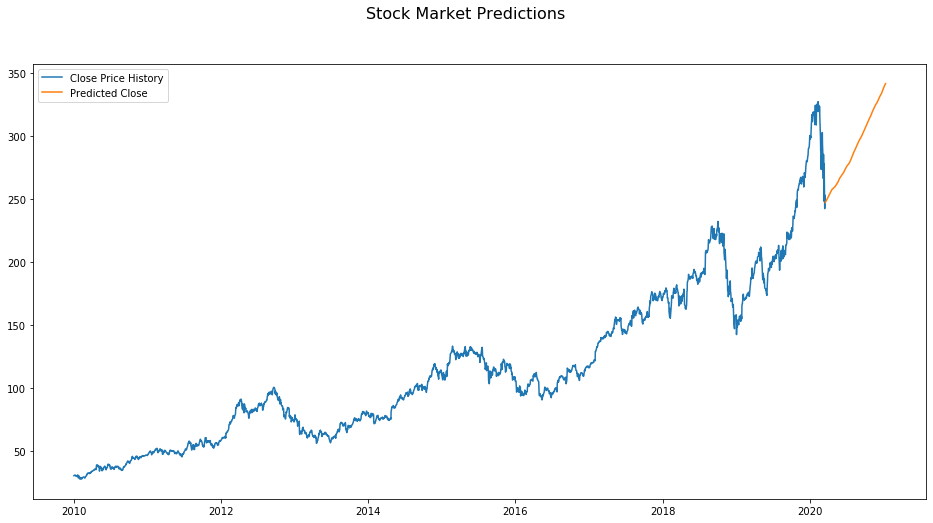

In [36]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#to plot within notebook
import matplotlib.pyplot as plt

# function to calculate percentage difference considering baseValue as 100%
def percentageChange(baseValue, currentValue):
    return((float(currentValue)-baseValue) / abs(baseValue)) *100.00

# function to get the actual value using baseValue and percentage
def reversePercentageChange(baseValue, percentage):
    return float(baseValue) + float(baseValue * percentage / 100.00)

# function to transform a list of values into the list of percentages. For calculating percentages for each element in the list
# the base is always the previous element in the list.
def transformToPercentageChange(x):
    baseValue = x[0]
    x[0] = 0
    for i in range(1,len(x)):
        pChange = percentageChange(baseValue,x[i])
        baseValue = x[i]
        x[i] = pChange

# function to transform a list of percentages to the list of actual values. For calculating actual values for each element in the list
# the base is always the previous calculated element in the list.
def reverseTransformToPercentageChange(baseValue, x):
    x_transform = []
    for i in range(0,len(x)):
        value = reversePercentageChange(baseValue,x[i])
        baseValue = value
        x_transform.append(value)
    return x_transform

#read the data file
df = pd.read_csv('data\\AAPL.csv')
# store the first element in the series as the base value for future use.
baseValue = df['Close'][0]

# create a new dataframe which is then transformed into relative percentages
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

# transform the 'Close' series into relative percentages
transformToPercentageChange(new_data['Close'])

# set Dat column as the index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# create train and test sets
dataset = new_data.values
train, valid = train_test_split(dataset, train_size=0.99, test_size=0.01, shuffle=False)

# convert dataset into x_train and y_train.
# prediction_window_size is the size of days windows which will be considered for predicting a future value.
prediction_window_size = 60
x_train, y_train = [], []
for i in range(prediction_window_size,len(train)):
    x_train.append(dataset[i-prediction_window_size:i,0])
    y_train.append(dataset[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

##################################################################################################
# create and fit the LSTM network
# Initialising the RNN
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 1, batch_size = 32)

##################################################################################################

#predicting future values, using past 60 from the train data
# for next 10 yrs total_prediction_days is set to 3650 days
total_prediction_days = 3650
inputs = new_data[-total_prediction_days:].values
inputs = inputs.reshape(-1,1)

# create future predict list which is a two dimensional list of values.
# the first dimension is the total number of future days
# the second dimension is the list of values of prediction_window_size size
X_predict = []
for i in range(prediction_window_size,inputs.shape[0]):
    X_predict.append(inputs[i-prediction_window_size:i,0])
X_predict = np.array(X_predict)

# predict the future
X_predict = np.reshape(X_predict, (X_predict.shape[0],X_predict.shape[1],1))
future_closing_price = model.predict(X_predict)

train, valid = train_test_split(new_data, train_size=0.99, test_size=0.01, shuffle=False)
date_index = pd.to_datetime(train.index)

#converting dates into number of days as dates cannot be passed directly to any regression model
x_days = (date_index - pd.to_datetime('1970-01-01')).days

# we are doing prediction for next 5 years hence prediction_for_days is set to 1500 days.
prediction_for_days = 300
future_closing_price = future_closing_price[:prediction_for_days]

# create a data index for future dates
x_predict_future_dates = np.asarray(pd.RangeIndex(start=x_days[-1] + 1, stop=x_days[-1] + 1 + (len(future_closing_price))))
future_date_index = pd.to_datetime(x_predict_future_dates, origin='1970-01-01', unit='D')

# transform a list of relative percentages to the actual values
train_transform = reverseTransformToPercentageChange(baseValue, train['Close'])

# for future dates the base value the the value of last element from the training set.
baseValue = train_transform[-1]
valid_transform = reverseTransformToPercentageChange(baseValue, valid['Close'])
future_closing_price_transform = reverseTransformToPercentageChange(baseValue, future_closing_price)

# recession peak date is the date on which the index is at the bottom most position.
recessionPeakDate =  future_date_index[future_closing_price_transform.index(min(future_closing_price_transform))]
minCloseInFuture = min(future_closing_price_transform);
print("The stock market will reach to its lowest bottom on", recessionPeakDate)
print("The lowest index the stock market will fall to is ", minCloseInFuture)

# plot the graphs
plt.figure(figsize=(16,8))
df_x = pd.to_datetime(new_data.index)
plt.plot(date_index,train_transform, label='Close Price History')
plt.plot(future_date_index,future_closing_price_transform, label='Predicted Close')

# set the title of the graph
plt.suptitle('Stock Market Predictions', fontsize=16)

# set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
plt.legend()

#display the graph
plt.show()

In [43]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#to plot within notebook
import matplotlib.pyplot as plt

# function to calculate percentage difference considering baseValue as 100%
def percentageChange(baseValue, currentValue):
    return((float(currentValue)-baseValue) / abs(baseValue)) *100.00

# function to get the actual value using baseValue and percentage
def reversePercentageChange(baseValue, percentage):
    return float(baseValue) + float(baseValue * percentage / 100.00)

# function to transform a list of values into the list of percentages. For calculating percentages for each element in the list
# the base is always the previous element in the list.
def transformToPercentageChange(x):
    baseValue = x[0]
    x[0] = 0
    for i in range(1,len(x)):
        pChange = percentageChange(baseValue,x[i])
        baseValue = x[i]
        x[i] = pChange

# function to transform a list of percentages to the list of actual values. For calculating actual values for each element in the list
# the base is always the previous calculated element in the list.
def reverseTransformToPercentageChange(baseValue, x):
    x_transform = []
    for i in range(0,len(x)):
        value = reversePercentageChange(baseValue,x[i])
        baseValue = value
        x_transform.append(value)
    return x_transform

#read the data file
def predictpriceofdata(stockname):
    df = pd.read_csv('data\\'+stockname+'.csv')
# store the first element in the series as the base value for future use.
    baseValue = df['Close'][0]

# create a new dataframe which is then transformed into relative percentages
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

# transform the 'Close' series into relative percentages
    transformToPercentageChange(new_data['Close'])

# set Dat column as the index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

# create train and test sets
    dataset = new_data.values
    train, valid = train_test_split(dataset, train_size=0.99, test_size=0.01, shuffle=False)

# convert dataset into x_train and y_train.
# prediction_window_size is the size of days windows which will be considered for predicting a future value.
    prediction_window_size = 60
    x_train, y_train = [], []
    for i in range(prediction_window_size,len(train)):
        x_train.append(dataset[i-prediction_window_size:i,0])
        y_train.append(dataset[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

##################################################################################################
# create and fit the LSTM network
# Initialising the RNN
    model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))

# Adding the output layer
    model.add(Dense(units = 1))
# Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
    model.fit(x_train, y_train, epochs = 1, batch_size = 1000)

##################################################################################################

#predicting future values, using past 60 from the train data
# for next 10 yrs total_prediction_days is set to 3650 days
    total_prediction_days = 3650
    inputs = new_data[-total_prediction_days:].values
    inputs = inputs.reshape(-1,1)

# create future predict list which is a two dimensional list of values.
# the first dimension is the total number of future days
# the second dimension is the list of values of prediction_window_size size
    X_predict = []
    for i in range(prediction_window_size,inputs.shape[0]):
        X_predict.append(inputs[i-prediction_window_size:i,0])
    X_predict = np.array(X_predict)

# predict the future
    X_predict = np.reshape(X_predict, (X_predict.shape[0],X_predict.shape[1],1))
    future_closing_price = model.predict(X_predict)

    train, valid = train_test_split(new_data, train_size=0.99, test_size=0.01, shuffle=False)
    date_index = pd.to_datetime(train.index)

#converting dates into number of days as dates cannot be passed directly to any regression model
    x_days = (date_index - pd.to_datetime('1970-01-01')).days

# we are doing prediction for next 5 years hence prediction_for_days is set to 1500 days.
    prediction_for_days = 300
    future_closing_price = future_closing_price[:prediction_for_days]

# create a data index for future dates
    x_predict_future_dates = np.asarray(pd.RangeIndex(start=x_days[-1] + 1, stop=x_days[-1] + 1 + (len(future_closing_price))))
    future_date_index = pd.to_datetime(x_predict_future_dates, origin='1970-01-01', unit='D')

# transform a list of relative percentages to the actual values
    train_transform = reverseTransformToPercentageChange(baseValue, train['Close'])

# for future dates the base value the the value of last element from the training set.
    baseValue = train_transform[-1]
    valid_transform = reverseTransformToPercentageChange(baseValue, valid['Close'])
    future_closing_price_transform = reverseTransformToPercentageChange(baseValue, future_closing_price)

# recession peak date is the date on which the index is at the bottom most position.
    recessionPeakDate =  future_date_index[future_closing_price_transform.index(min(future_closing_price_transform))]
    minCloseInFuture = min(future_closing_price_transform);
    print("The stock market will reach to its lowest bottom on", recessionPeakDate)
    print("The lowest index the stock market will fall to is ", minCloseInFuture)

# plot the graphs
    plt.figure(figsize=(16,8))
    df_x = pd.to_datetime(new_data.index)
    plt.plot(date_index,train_transform, label='Close Price History')
    plt.plot(future_date_index,future_closing_price_transform, label='Predicted Close')

# set the title of the graph
    plt.suptitle('Stock Market Predictions', fontsize=16)

# set the title of the graph window
    fig = plt.gcf()
    fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
    plt.legend()

#display the graph
    plt.show()
    
    dictofdateandprice={}
    
    for i in range(38,50):
        dictofdateandprice[future_date_index[i]]=future_closing_price_transform[i]
    return dictofdateandprice

Epoch 1/1
2510/2510 [==============================] - 5s 2ms/step - loss: 3.9178
The stock market will reach to its lowest bottom on 2020-03-19 00:00:00
The lowest index the stock market will fall to is  1831.4870958328247


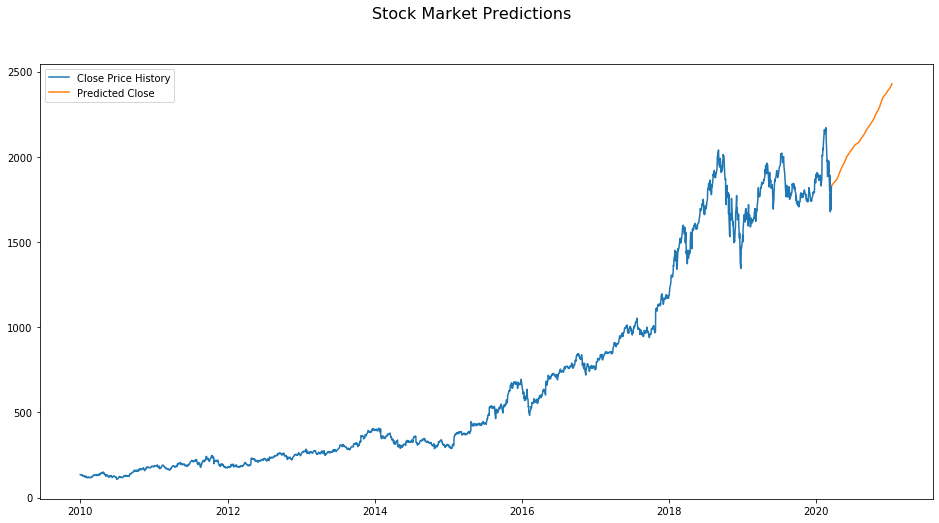

{Timestamp('2020-04-26 00:00:00'): 1903.2810851335526, Timestamp('2020-04-27 00:00:00'): 1906.4126385450363, Timestamp('2020-04-28 00:00:00'): 1909.5660251379013, Timestamp('2020-04-29 00:00:00'): 1912.711457848549, Timestamp('2020-04-30 00:00:00'): 1915.799932360649, Timestamp('2020-05-01 00:00:00'): 1918.7965644598007, Timestamp('2020-05-02 00:00:00'): 1921.6950474977493, Timestamp('2020-05-03 00:00:00'): 1924.4810618162155, Timestamp('2020-05-04 00:00:00'): 1927.1296690702438, Timestamp('2020-05-05 00:00:00'): 1929.6583405733109, Timestamp('2020-05-06 00:00:00'): 1932.1034985780716, Timestamp('2020-05-07 00:00:00'): 1934.52217066288}


In [44]:
dictis=predictpriceofdata('amzn')
print(dictis)

In [40]:
for i in range(38,50):
    print(future_date_index[i])

2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00
2020-05-06 00:00:00
2020-05-07 00:00:00


In [38]:
for i in range(38,50):
    print(future_closing_price_transform[i])


258.15589214861393
258.326474159956
258.4976716339588
258.6673365831375
258.8301658630371
258.9822059124708
259.12286752462387
259.2551182359457
259.3854437172413
259.5243236273527
259.68369130790234
259.8718052506447
